<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Refined-version" data-toc-modified-id="Refined-version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Refined version</a></span></li></ul></div>

In [1]:
import pandas as pd
import editdistance
from tqdm import tqdm_notebook as tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
richelieu = 'richelieu'

In [2]:
df = pd.read_csv('strict_adressing.csv')
df.dropna(inplace=True)
df.rename(columns={'Unnamed: 0': 'Doc ID'}, inplace=True)

In [3]:
df.columns

Index(['Doc ID', 'Nom', 'Métier', 'Rue', 'Numéro', 'annee'], dtype='object')

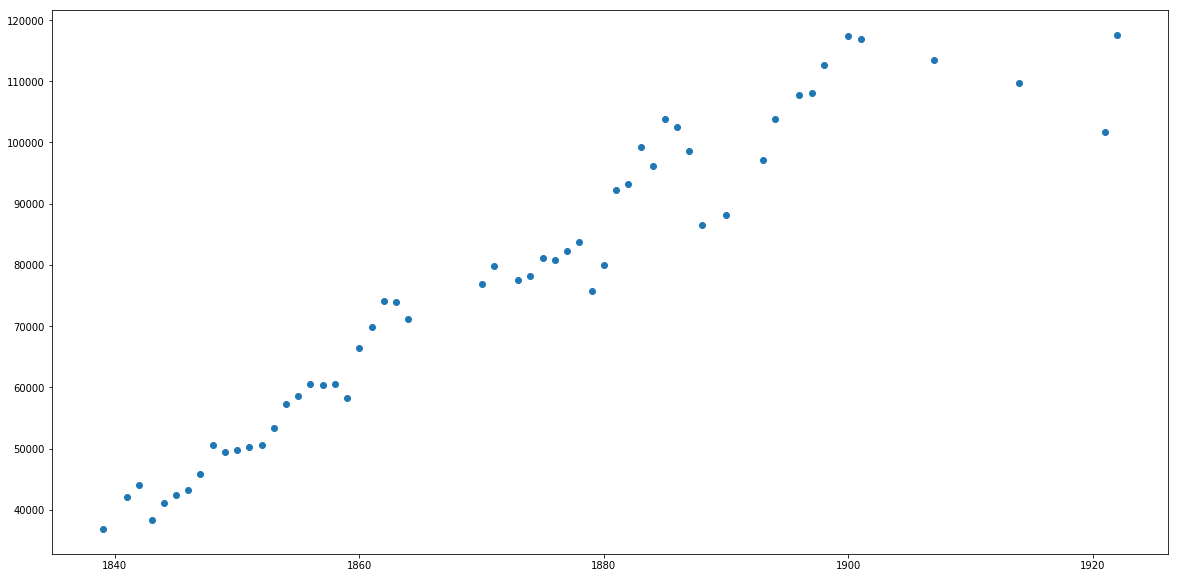

In [4]:
plt_df = df.groupby('annee')['Nom'].count().reset_index()
plt.figure(figsize=(20,10))
plt.plot(plt_df['annee'], plt_df['Nom'], 'o')

In [66]:
#df_geo = pd.read_csv('adresse_paris.csv', sep=';') # numérotation actuelle des voies (Paris Open Data)
df_geo = pd.read_csv('Num_Voies_Vasserot.csv', sep=';') # numérotation d'après le plan Vasserot (Alpage)
df_geo.dropna(inplace=True)
df_geo.head()

,"ROWID,N,10,0","ID_ALPAGE,N,10,0","ID_NUM_SCA,C,18","QUARTIER,C,25","NOM_ENTIER,C,50","ID_PARC,C,10","NUM_VOIES,C,10","GEOX,N,24,15","GEOY,N,24,15","STYLE,C,80","CSS_CLASS,C,11","EXTRA,C,1"
4,5,5,ADO75CA_ANO267,Louvre,Rue de la Joaillerie,PA17936,1,600827,128595,fill-rule:evenodd;fill:#FF0000;fill-opacity: 1...,x1L84,_
5,6,6,ADO75CA_ANO267,Louvre,Rue Saint Jacques la Boucherie,PA17936,41,600804,128616,fill-rule:evenodd;fill:#FF0000;fill-opacity: 1...,x1L84,_
6,7,7,ADO75CA_ANO267,Louvre,Rue Saint Jacques la Boucherie,PA17936,39,600810,128613,fill-rule:evenodd;fill:#FF0000;fill-opacity: 1...,x1L84,_
7,8,8,ADO75CA_ANO267,Louvre,Rue Saint Jacques la Boucherie,PA17936,37,600816,128610,fill-rule:evenodd;fill:#FF0000;fill-opacity: 1...,x1L84,_
8,9,9,ADO75CA_ANO267,Louvre,Rue Saint Jacques la Boucherie,PA17936,35,600820,128609,fill-rule:evenodd;fill:#FF0000;fill-opacity: 1...,x1L84,_


In [67]:
#len(df_geo[df_geo['L_ADR'].str.contains('RUE DE RICHELIEU')])
len(df_geo[df_geo['NOM_ENTIER,C,50'].str.contains('Rue de Richelieu')])

105

In [7]:
distances = []
for items in tqdm(df['Rue'].str.lower().str.split()):
    dists = []
    for item in items:
        dists.append(editdistance.eval(richelieu, item))
    distances.append(min(dists))
distances = np.array(distances)

In [8]:
num_items_per_rue = df['Rue'].str.lower().str.split().apply(len)

In [9]:
df_sel = df[(distances <= 2) & (num_items_per_rue <= 100)]
len(df_sel)

23256

In [10]:
df_sel.sample(10)

,Doc ID,Nom,Métier,Rue,Numéro,annee
1622874,bpt6k9672776c,leuigartniT,tailleur,Richelieu,82.,1880
2098942,bpt6k96839542,Durin,chimiste,Richelieu,67.,1885
2789342,bpt6k9732740w,Bidal (E.),équipements et harnachements militaires,Richelieu,3.,1894
556,bpt6k6282019m,Chantal (Mme),eau Chantal pour teindre les cheveux,Richelieu,65.,1855
1410363,bpt6k9668037f,Léon frères,négociants-commissionnaires,Richelieu,28 bis.,1884
3318302,bpt6k9763553z,Veber (Ellg.),dessinuleùr en dentelles,Richelieu,106.,1876
2084406,bpt6k96839542,Chanet,vins,Richelieu,99.,1885
107876,bpt6k62906378,Barrère,ohapelier,Richelieu,61.,1846
122549,bpt6k62906378,Geiger,tailleur,Richelieu,74.,1846
3369040,bpt6k9763554c,Lance (Mme),épileusc,Richelieu,33.,1875


In [11]:
df_sel.loc[:, 'Numéro'] = df_sel['Numéro'].str.strip('.*').values
df_sel.loc[:, 'Numéro'] = df_sel['Numéro'].str.replace('\(.*\)', '').str.replace('[\. \*]', '').values
df_sel.loc[:, 'Numéro'] = df_sel['Numéro'].str.replace('[^\w\s]','').str.strip()

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
df_sel['Numéro'].str.replace('[^\w\s]','').str.strip().loc[3998584]

'92'

In [68]:
#nums_richelieu = df_geo[df_geo['L_ADR'].str.contains('RUE DE RICHELIEU')]['N_VOIE'].astype(str).values
nums_richelieu = df_geo[df_geo['NOM_ENTIER,C,50'].str.contains('Rue de Richelieu')]['NUM_VOIES,C,10'].astype(str).values

In [69]:
df_sel[df_sel['Numéro'].isin(nums_richelieu)]['Métier'].value_counts()

tailleur      3563
modes          649
bottier        481
couturière     419
médecin        317
Name: Métier, dtype: int64

In [70]:
num_items_per_rue.loc[4095063]

3

In [71]:
df_sel[(df_sel['annee'] == 1921) & (~df_sel['Numéro'].isin(nums_richelieu))]

,Doc ID,Nom,Métier,Rue,Numéro,annee,decade
20666,bpt6k97774838,Dodibert (H.),tailleur,r. de Richelieu,57,1921,1920
20707,bpt6k97774838,Higrt Lire Tailor,tailleur,r. de Richelieu,112,1921,1920
20743,bpt6k97774838,Martin,tailleur,r. de Richelieu,57,1921,1920


In [72]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
df[(df['annee'] == 1921) & (distances < 2)]

ValueError: operands could not be broadcast together with shapes (21058,) (4210787,) 

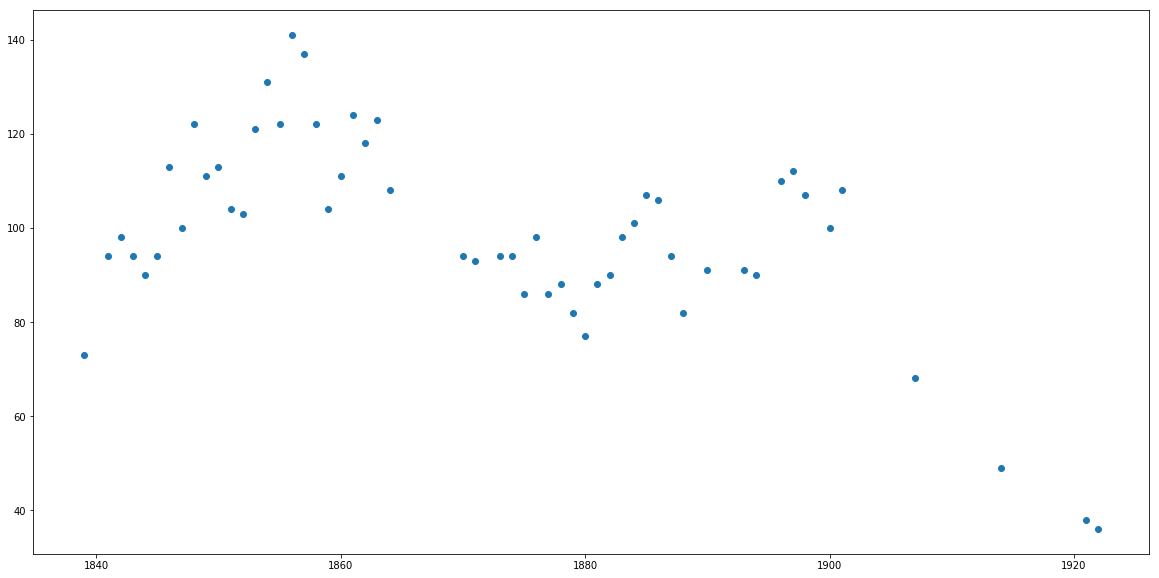

In [74]:
plt_df = df_sel[df_sel['Numéro'].isin(nums_richelieu)].groupby('annee')['Nom'].count().reset_index()
plt.figure(figsize=(20,10))
plt.plot(plt_df['annee'], plt_df['Nom'], 'o')

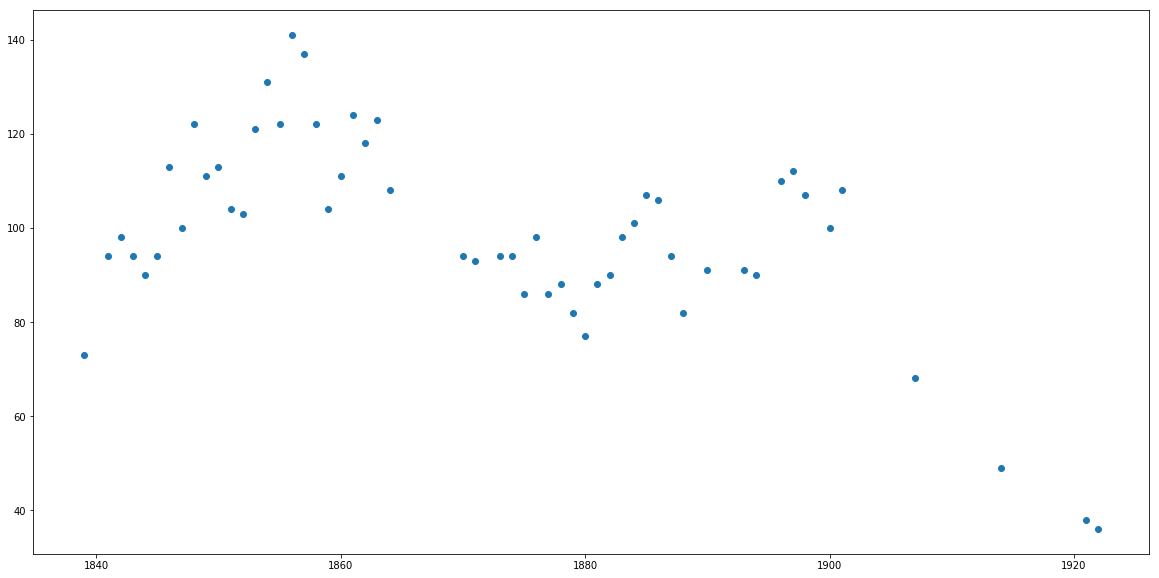

In [75]:
plt_df = df_sel[df_sel['Numéro'].isin(nums_richelieu)].groupby('annee')['Nom'].count().reset_index()
plt.figure(figsize=(20,10))
plt.plot(plt_df['annee'], plt_df['Nom'], 'o')

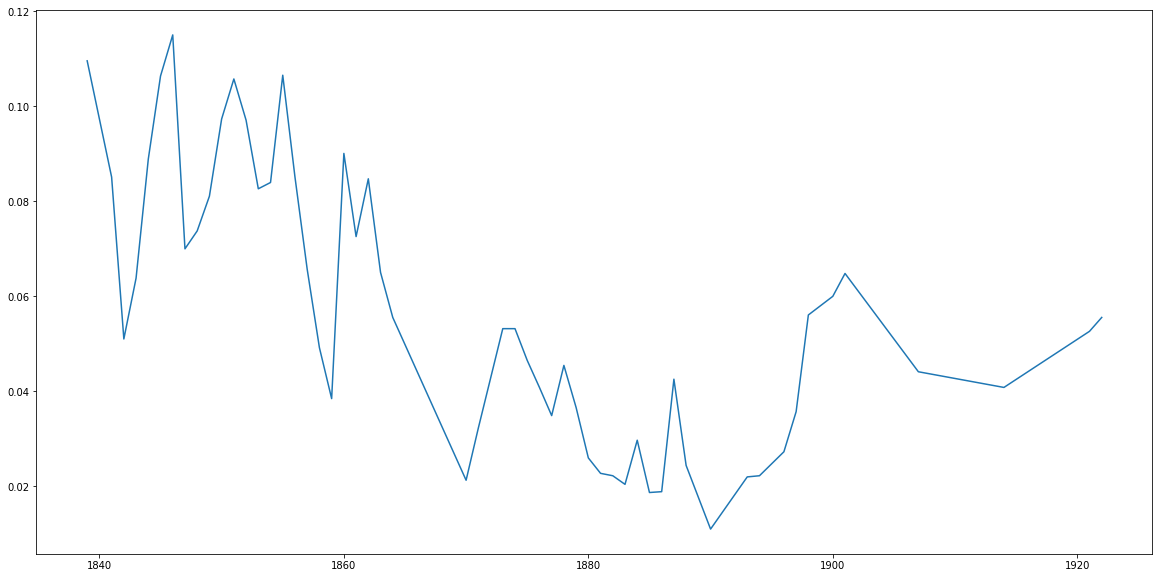

In [76]:
plt_df = (df_sel[df_sel['Numéro'].isin(nums_richelieu) & (df_sel["Métier"] == 'médecin')].groupby('annee')['Nom'].count()/df_sel[df_sel['Numéro'].isin(nums_richelieu)].groupby('annee')['Nom'].count()).reset_index()
plt.figure(figsize=(20,10))
plt.plot(plt_df['annee'], plt_df['Nom'])

In [22]:
plt_df

,annee,Nom
0,1839,0.030303
1,1841,0.025237
2,1842,0.014368
3,1843,0.022293
4,1844,0.028939
5,1845,0.031447
6,1846,0.041791
7,1847,0.021807
8,1848,0.022959
9,1849,0.022613


In [23]:
df_sel[df_sel['Numéro'].isin(nums_richelieu)].to_csv('richelieu.csv')

## Refined version

In [2]:
df_geo = pd.read_csv('adresse_paris.csv', sep=';')
df_geo = df_geo[df_geo['L_ADR'].str.contains('RUE DE RICHELIEU')]
df_geo.head()

,Geometry X Y,Geometry,N_SQ_AD,N_VOIE,C_SUF1,C_SUF2,C_SUF3,C_AR,A_NVOIE,B_ANGLE,B_OFFSTDF,B_AFFSTDF,B_HORS75,L_NVOIE,L_ADR,N_SQ_AR,N_SQ_VO,OBJECTID
10,"48.8711520925, 2.33955717151","{""type"": ""Point"", ""coordinates"": [2.3395571715...",750005527,95,NaN,NaN,NaN,2,72.419998,O,O,NaN,N,95,95 RUE DE RICHELIEU,750000002,750005602,1696
12,"48.8668319878, 2.33734879222","{""type"": ""Point"", ""coordinates"": [2.3373487922...",750005506,57,NaN,NaN,NaN,2,70.669998,N,O,NaN,N,57,57 RUE DE RICHELIEU,750000002,750005602,1867
18,"48.8652882061, 2.33657047474","{""type"": ""Point"", ""coordinates"": [2.3365704747...",750001937,33,NaN,NaN,NaN,1,70.430000,N,O,NaN,N,33,33 RUE DE RICHELIEU,750000001,750005602,42609
29,"48.8670504206, 2.33746479526","{""type"": ""Point"", ""coordinates"": [2.3374647952...",750005508,61,NaN,NaN,NaN,2,70.690002,N,O,NaN,N,61,61 RUE DE RICHELIEU,750000002,750005602,49744
37,"48.8699867258, 2.33863746421","{""type"": ""Point"", ""coordinates"": [2.3386374642...",750164008,85,NaN,P,NaN,2,165.490005,N,O,NaN,N,85 P,85 P RUE DE RICHELIEU,750000002,750005602,27443


In [15]:
df = pd.read_csv("richelieu_refined.csv")
df = df.iloc[:, 1:]
df.head()

,Doc ID,Nom,Métier,Rue,Numéro,annee
0,bpt6k6282019m,Bosviel,avocat au conseil d'Etat et à la cour de cassa...,Hichelien,60,1855
1,bpt6k6282019m,Braquehais,artlste-photogtaphe,Richelieu,110,1855
2,bpt6k6282019m,chiûou et Parenthou jeune,confection en gros,Chaise (J.) iNffi.bij.-joaillier. Richelieu,10,1855
3,bpt6k6282019m,Chantal (Mme),eau Chantai pour teindre les cheveux,Richelieu,65,1855
4,bpt6k6282019m,Choisy (Ernest de),éditeur du Court ât la Banque et de la Bourie,Richelieu,79,1855


In [16]:
jobs_counts = df['Métier'].value_counts()

In [17]:
jobs_counts/jobs_counts.sum()*100

tailleur                                                                       17.926679
modes                                                                           3.281413
bottier                                                                         2.312660
couturière                                                                      2.079970
médecin                                                                         1.548105
coiffeur                                                                        1.282173
banquier                                                                        1.267927
vins                                                                            1.229936
bijoutier-joaillier                                                             1.073226
avoué de 1ère instance                                                          0.954507
chemisier                                                                       0.916516
chapelier            

In [18]:
jobs_selection = jobs_counts.iloc[:100].index.values

In [19]:
job = jobs_counts.iloc[:10].index.values[0]

In [20]:
import seaborn as sns

In [21]:
df['decade'] = df['annee'] - df['annee'] % 10

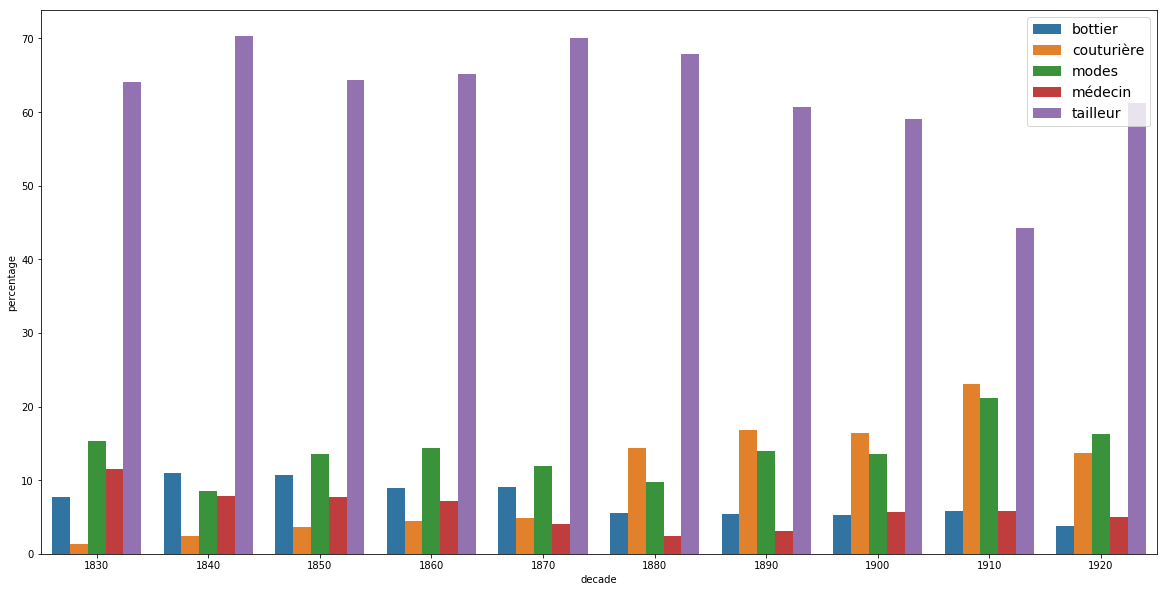

In [22]:
job_sel = jobs_counts.iloc[0:5].index.values
df_sel = df[df['Métier'].isin(job_sel)]
job_count = (df_sel
             .groupby('decade')['Métier']
             .value_counts(normalize=True)
             .rename('percentage')
             .mul(100)
             .reset_index()
             .sort_values('Métier'))
plt.figure(figsize=(20,10))
sns.barplot(x='decade', y='percentage', hue='Métier', data=job_count)
plt.legend(loc=1, prop={'size': 14});

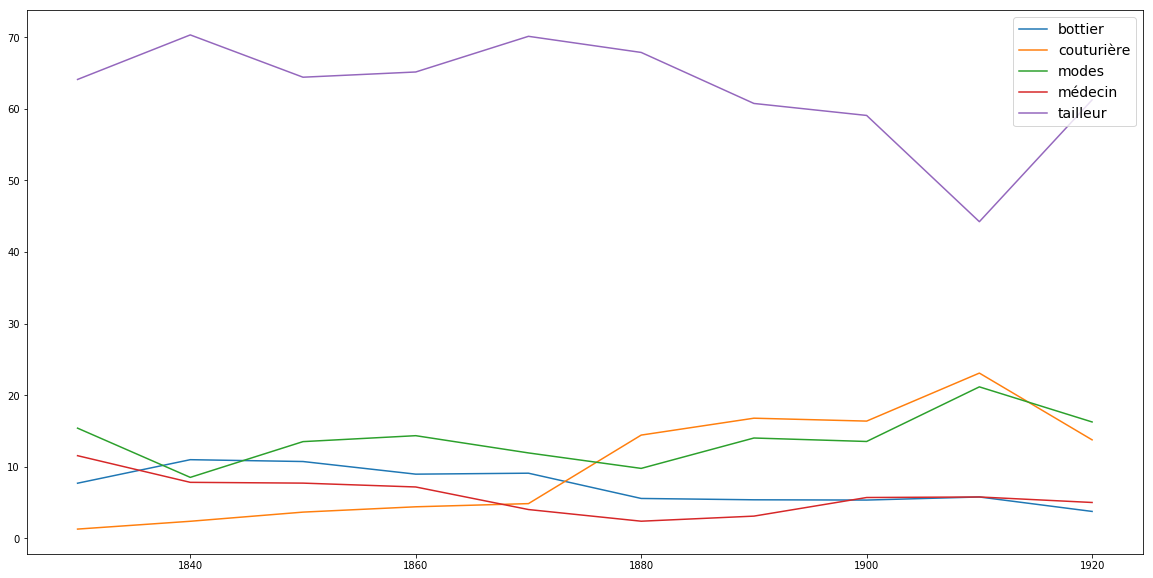

In [23]:
plt.figure(figsize=(20,10))
job_sel = sorted(job_sel)
job_count = job_count.sort_values('decade')
for job in job_sel:
    tmp = job_count[job_count['Métier'] == job]
    plt.plot(tmp['decade'], tmp['percentage'])
plt.legend(job_sel, loc=1, prop={'size': 14});

In [24]:
df_geo = pd.concat([df_geo, df_geo['Geometry X Y'].str.split(',', expand=True).rename(columns={0:'lat', 1:'lon'}).astype(float)], axis=1)

In [25]:
df_georef = df.set_index('Numéro').join(df_geo.set_index('N_VOIE')[['lat', 'lon']]).reset_index()

In [26]:
df_georef

,index,Doc ID,Nom,Métier,Rue,annee,decade,lat,lon
0,1,bpt6k6286466w,Patard,tailleur,Richelieu,1842,1840,48.864018,2.335872
1,1,bpt6k6286466w,Poitevin,bonnetier,Richelieu,1842,1840,48.864018,2.335872
2,1,bpt6k6286466w,Sanson jeune,directeur de la banque philanthropique,pl. Richelieu,1842,1840,48.864018,2.335872
3,1,bpt6k62906378,Bonnin,vins,RichelIeu,1846,1840,48.864018,2.335872
4,1,bpt6k62906378,Chaufïy,épicerie,place Richelieu,1846,1840,48.864018,2.335872
5,1,bpt6k62906378,Cochet,tailleur,place Richelieu,1846,1840,48.864018,2.335872
6,1,bpt6k62906378,Fischer et Hartmann,toillenrs,pl. Richelieu,1846,1840,48.864018,2.335872
7,1,bpt6k62906378,Loyer frères,tailleur,Richelieu,1846,1840,48.864018,2.335872
8,1,bpt6k62906378,Maillot. directeur du Monde musical,placeur,Richelieu,1846,1840,48.864018,2.335872
9,1,bpt6k62906378,Maliet,tailleur,pl. Richelieu,1846,1840,48.864018,2.335872


In [27]:
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster 

In [28]:
map_richelieu = folium.Map(location=[df_georef['lat'].mean(), 
                                df_georef['lon'].mean()], 
                      zoom_start=15)

colors = ['red', 'green', 'blue', 'yellow', 'pink']

for idx, j in enumerate(job_sel):
    callback = ("""function (row) {
                var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "%s",  radius: 2});
                return circle};"""%colors[idx])
    mc = FastMarkerCluster(df_georef[df_georef['Métier'] == j][['lat', 'lon']].values.tolist(), callback=callback)       
    map_richelieu.add_child(mc)
map_richelieu

In [30]:
map_richelieu = folium.Map(location=[df_georef['lat'].mean(), 
                                df_georef['lon'].mean()], 
                      zoom_start=15)
mc = MarkerCluster()
for nom, metier, annee, numero, lat, lon in df_georef[(df_georef['annee'] == 1850)][['Nom', 'Métier', 'annee', 'index', 'lat', 'lon']].values:
    text = "%s, %s habitait en %d au %d rue Richelieu"%(nom, metier, annee, numero)
    popup = folium.Popup(text, parse_html=True)
    mc.add_child(folium.Marker(location=[lat,  lon], popup=popup))
map_richelieu.add_child(mc)

In [40]:
map_richelieu.save('test.html')

In [41]:
len(df)

21058